In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [132]:

from scipy.stats import rv_continuous
import numpy as np
from numpy import exp, sqrt
from scipy.integrate import quad
import matplotlib.pyplot as plt
import wkbl
from wkbl.particle import capture as ca
import fdulib as vdf
import sys
from scipy.misc import derivative as da
from scipy.special import erf
plt.ion()
plt.close('all')

$$\Large{Standar\,\,deviation\,\,\sigma}$$

the expectation value of a function $g(v)$ is defined as $$E[g(v)]=\langle g \rangle=\int _{-\infty} ^{\infty} g(v) \,f(v) \,dv$$
where $f(v)$ is the probability distribution, in our case the normalized velocity distribution function, and $$g(v)=\frac{PP(v)}{v}$$ here PP(v) is the particle physics section of the capture rate expresion as defined by A.Gould in 1987. Then the standard deviation $\sigma_g$ is given by

$$\sigma_g^{2}= E[(g(v)-E[g(v)])^2]$$ 

$$\sigma_g^{2}= E[g(v)^2] - \big[E[g(v)]\big]^2\,=\,\langle g(v)^2 \rangle - \langle g(v) \rangle^2$$ 

$$\sigma_g^{2} = \int _{-\infty} ^{\infty} g(v)^2 \,f(v) \,dv - \Bigg[\int _{-\infty} ^{\infty} g(v) \,f(v) \,dv\Bigg]^2 $$

finally:
$$\sigma_g^{2} = \int _{v_{min}} ^{v_{esc}} g(v)^2 \,f(v) \,dv - \Bigg[\int _{v_{min}} ^{v_{esc}} g(v) \,f(v) \,dv\Bigg]^2 $$


so then lets define my test case
$$f(v) = v^2 e^{-av^2}$$
and
$$g(v) = \frac{1}{v}$$

In [359]:
x = np.linspace(0,1000,1000)

def pri(u):
    a=200.
    return np.sqrt(2./np.pi)*(u**2)*np.exp(-(u**2)/(2*a**2)) / a*3
normme = np.vectorize(pri)
norm = np.sum(normme(x))

def mymawelian(u):
    a=200.
    return np.sqrt(2./np.pi)*(u**2)*np.exp(-(u**2)/(2*a**2)) / a*3 / norm

maxw = np.vectorize(mymawelian)


def means(m):
    a=200.
    return m*2.*a*np.sqrt(2./np.pi)
get_means = np.vectorize(means)

def g(u,m):return m*u

get_g = np.vectorize(g)

def numerical_means(m):
    """
    the producto to be inside the integral
    """
    def inside_int(u):
        va = maxw(u)
        return  va*u*m
    print np.sum(maxw(u))
    final = quad(inside_int,0,1000)[0]
    #array = map(inside_int,x)
    #final = np.trapz(array)
    return final

get_NUMmean = np.vectorize(numerical_means)

"""
def analitical_sigma(u,m):
    a=1./70000.
    first = np.sqrt(np.pi/a)*erf(u*np.sqrt(a))/2.
    second = np.exp(-2.*a*(u**2))/4./a**2
    third = np.sqrt(np.pi/((3.*a)**3))*erf(u*np.sqrt(3.*a))/16./a**2
    fourth = u*np.exp(-3*a*u**2)/24./a**3
    return first,second,third,fourth
"""
def analitical_sigma(m):
    a=200.
    return np.sqrt(a**2 * ((3*np.pi)-8) * (m**2) / np.pi)

get_an_sigma = np.vectorize(analitical_sigma)

m_arr = np.logspace(1,4,30)
    
    
    
def variance_OG(m):
    def inside_int(u):
        va = maxw(u)
        va2 = m*u
        return va *( va2 - means(m) )**2
    array = map(inside_int,x)
    #print "mapped"
    final = np.trapz(array)
    return np.sqrt(final)

get_var = np.vectorize(variance_OG)

<IPython.core.display.Javascript object>


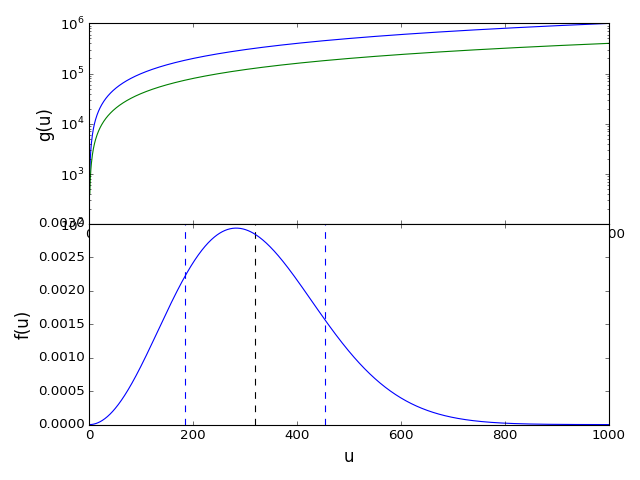

In [360]:
u = np.linspace(1,1000,1000)


fig, ax = plt.subplots(2,1)
ax[0].set_yscale("log")
ax[0].set_ylabel("g(u)",fontsize=15)
ax[1].set_ylabel("f(u)",fontsize=15)
ax[1].set_xlabel("u",fontsize=15)
#ax[1].set_ylim([0,0.039])

ax[0].plot(u,get_g(u,1000))
ax[0].plot(u,get_g(u,400))
a=200.
ax[1].axvline(x=2*200.*np.sqrt(2/np.pi),color='k',linestyle='--')
ax[1].axvline(x=(2*200.*np.sqrt(2/np.pi))+np.sqrt(a**2 * ((3*np.pi)-8) / np.pi),color='b',linestyle='--')
ax[1].axvline(x=(2*200.*np.sqrt(2/np.pi))-np.sqrt(a**2 * ((3*np.pi)-8) / np.pi),color='b',linestyle='--')

ax[1].plot(u,maxw(u))
fig.tight_layout(h_pad=-1.8)



<IPython.core.display.Javascript object>


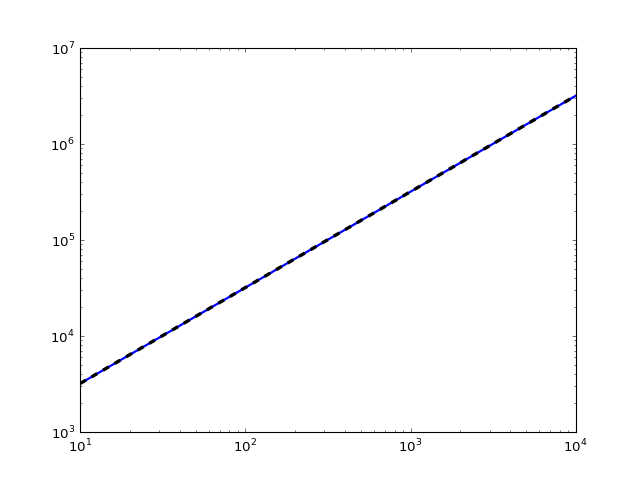

0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295
0.09919833652572295


In [344]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(m_arr, get_means(m_arr),"b-",lw=2)
#ax.plot(m_arr, sig_ana)

ax.plot(m_arr,get_NUMmean(m_arr),"k--",lw=3)
#ax.plot(u, means(u,400))


In [361]:
print elsig

[]


<IPython.core.display.Javascript object>


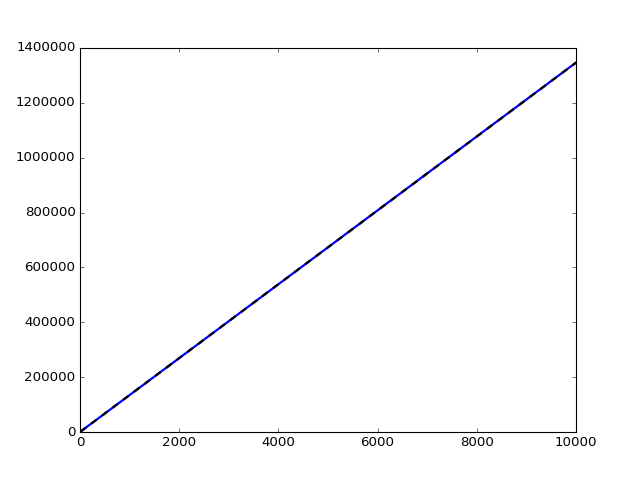

In [366]:
fig, ax = plt.subplots()
#ax.set_xscale('log')
ax.plot(m_arr,get_an_sigma(m_arr),'b-',lw=2)
ax.plot(m_arr,get_var(m_arr),'k--',lw=2)


In [367]:
ana_sigma_arr = get_an_sigma(m_arr)
num_sigma_arr = get_var(m_arr)

<IPython.core.display.Javascript object>


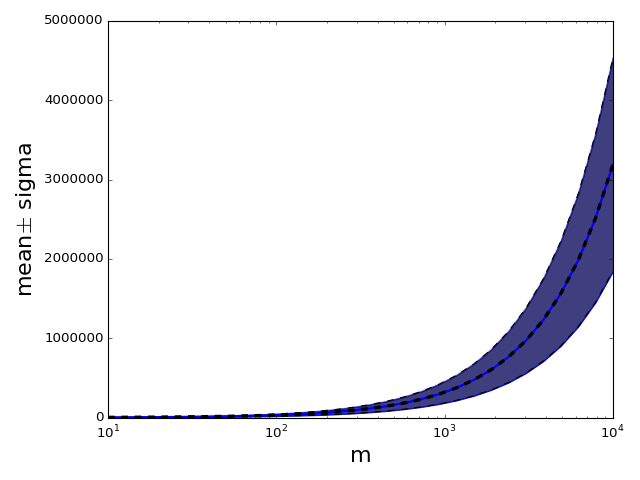

1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008162145
1.0010010008

In [376]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_xlabel("m",fontsize=20)
ax.set_ylabel(r"mean$\pm$ sigma",fontsize=20)

#ax.set_yscale('log')

ax.plot(m_arr, get_means(m_arr),"b-",lw=2)
ax.plot(m_arr, get_means(m_arr)+ana_sigma_arr,'b-',alpha=0.5)
ax.plot(m_arr, get_means(m_arr)-ana_sigma_arr,'b-',alpha=0.5)
ax.fill_between(m_arr, get_means(m_arr)+ana_sigma_arr,get_means(m_arr)-ana_sigma_arr,color='b',alpha=0.5)

ax.plot(m_arr,get_NUMmean(m_arr),"k--",lw=3)
ax.plot(m_arr,get_NUMmean(m_arr)+num_sigma_arr,"k--")
ax.plot(m_arr,get_NUMmean(m_arr)-num_sigma_arr,"k--")

ax.fill_between(m_arr, get_NUMmean(m_arr)+num_sigma_arr,get_NUMmean(m_arr)-num_sigma_arr,color='k',alpha=0.5)
fig.tight_layout()
#ax.plot(u, means(u,400))
